In [1]:
import pandas as pd
from pathlib import Path
from sad2_final_project.analysis import add_missing_metrics_from_experiment, loader_obsolete_data
from sad2_final_project.bnfinder import load_external_data
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data/trajectory_length_vs_attractors')

/home/maxi7524/repositories/SAD2_final_project


In [2]:
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
metrics_list=['TP', 'FP', 'FN', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']
df = add_missing_metrics_from_experiment(df, DATA_PATH, metrics_list, after_idx='attractor_ratio')

[Progress] 1/18000 conditions completed (0.0%)
[Progress] 2/18000 conditions completed (0.0%)
[Progress] 3/18000 conditions completed (0.0%)
[Progress] 4/18000 conditions completed (0.0%)
[Progress] 5/18000 conditions completed (0.0%)
[Progress] 6/18000 conditions completed (0.0%)
[Progress] 7/18000 conditions completed (0.0%)
[Progress] 8/18000 conditions completed (0.0%)
[Progress] 9/18000 conditions completed (0.1%)
[Progress] 10/18000 conditions completed (0.1%)
[Progress] 11/18000 conditions completed (0.1%)
[Progress] 12/18000 conditions completed (0.1%)
[Progress] 13/18000 conditions completed (0.1%)
[Progress] 14/18000 conditions completed (0.1%)
[Progress] 15/18000 conditions completed (0.1%)
[Progress] 16/18000 conditions completed (0.1%)
[Progress] 17/18000 conditions completed (0.1%)
[Progress] 18/18000 conditions completed (0.1%)
[Progress] 19/18000 conditions completed (0.1%)
[Progress] 20/18000 conditions completed (0.1%)
[Progress] 21/18000 conditions completed (0.1%)
[

In [4]:
# df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
df['attractor_ratio']

0        0.776667
1        0.744000
2        0.851333
3        0.844000
4        0.862667
           ...   
17995    0.990723
17996    0.750573
17997    0.958776
17998    0.624765
17999    0.786794
Name: attractor_ratio, Length: 18000, dtype: float64

CZĘŚĆ 2

In [5]:
df['attractor_ratio']

,attractor_ratio,attractor_ratio
0,0.776667,0.776667
1,0.744000,0.744000
2,0.851333,0.851333
3,0.844000,0.844000
4,0.862667,0.862667
...,...,...
17995,0.990723,0.990723
17996,0.750573,0.750573
17997,0.958776,0.958776
17998,0.624765,0.624765


In [ ]:


load_external_data()

IDEA DLA JOANNY 

In [17]:
df_summary = (
    df
    .groupby(["trajectory_length", "num_nodes"])
    .agg(
        median_ar=("attractor_ratio", "median"),
        q25_ar=("attractor_ratio", lambda x: x.quantile(0.25)),
        mean_ar=("attractor_ratio", "mean"),
        std_ar=("attractor_ratio", "std"),
        n=("attractor_ratio", "size")
    )
    .reset_index()
)

In [ ]:
df_summary["scale_ratio"] = (
    df_summary["trajectory_length"] / df_summary["num_nodes"]
)
df_summary

,trajectory_length,num_nodes,median_ar,q25_ar,mean_ar,std_ar,n,scale_ratio
0,10,5,0.876246,0.667560,0.785662,0.205530,600,2.000000
1,10,7,0.791190,0.491120,0.690165,0.273711,600,1.428571
2,10,9,0.698704,0.289782,0.594321,0.322780,600,1.111111
3,10,11,0.634766,0.168255,0.540005,0.350391,600,0.909091
4,10,13,0.551619,0.098029,0.486880,0.363200,600,0.769231
5,15,5,0.919281,0.800633,0.853411,0.164220,600,3.000000
6,15,7,0.860757,0.602486,0.756670,0.241930,600,2.142857
7,15,9,0.810556,0.460341,0.692933,0.280490,600,1.666667
8,15,11,0.768473,0.332034,0.637546,0.321061,600,1.363636
9,15,13,0.714176,0.199570,0.576234,0.355616,600,1.153846


<Axes: xlabel='scale_ratio', ylabel='median_ar'>

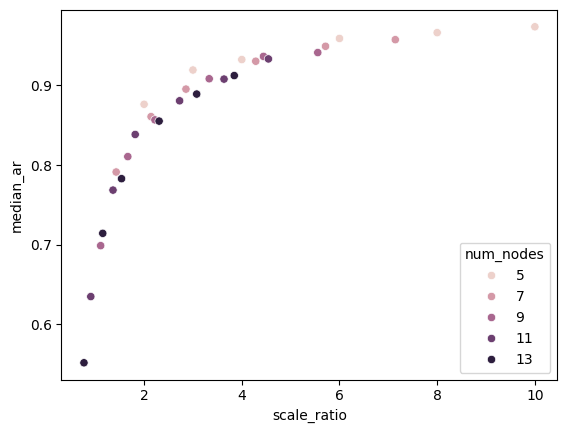

In [21]:
import seaborn as sns
sns.scatterplot(
    data=df_summary,
    x="scale_ratio",
    y="median_ar",
    hue="num_nodes"
)


<Axes: xlabel='trajectory_length', ylabel='num_nodes'>

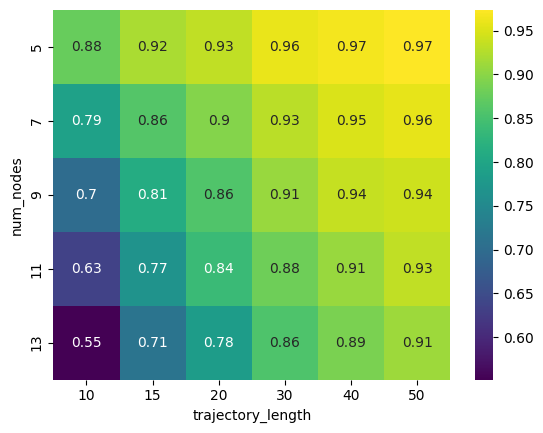

In [22]:
pivot = df_summary.pivot(
    index="num_nodes",
    columns="trajectory_length",
    values="median_ar"
)

sns.heatmap(pivot, cmap="viridis", annot=True)
